<a href="https://colab.research.google.com/github/breudes/contagem-de-tweets/blob/master/tweets_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importa as bibliotecas e recebe o 'bearer token' (chave necessário pra utilizar o tipo de requisição feita pela API do twitter que vamos utilizar, nesse caso é o Tweet Counts) do usuário 


In [ ]:
import sys
import requests
import json
import datetime
import matplotlib.pyplot as plt
import numpy as np

bearer_token = input("Informe o 'bearer token' da sua conta de desenvolvedor no Twitter: ")
keywords = input("Informe as palavras chaves para a busca: ")

def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

Informe o 'bearer token' da sua conta de desenvolvedor no Twitter: AAAAAAAAAAAAAAAAAAAAAEwRSQEAAAAAf97naAq%2BsPgVcE3%2BfRAJCc%2F4IN4%3DMXyFlxNeaKykTGpbjRUB0aW4kcR6yAOo0f09w1J0jPM3E4gsdz
Informe as palavras chaves para a busca: vacina


Agora, vamos receber as palavras chaves (em inglês, *keywords*) para realizar a busca via API. Além disso, já damos início as requisições.

In [ ]:
# parâmetros definidos pelo o usuário

# faz um requisição do tipo GET com a url e parâmetros informados, assim como o bearer_token necessário para o acesso via API
def connect_to_endpoint(url, params):
      response = requests.get(url, auth=bearer_oauth, params=params)
      print(response.status_code)
      if response.status_code != 200:
          raise Exception(response.status_code, response.text)
      return response.json()

# url definida 
url = "https://api.twitter.com/2/tweets/counts/recent"

# neste trabalho são feitos duas requisições: uma referente as últimas 24 horas e a outra referente aos últimos 7 dias. Sendo assim, precisamos definir variaveis do tipo data para definir o intervalo de tempo da primeira requisição.
# definindo a data (e hora) atual e a data correspondente a 24 atrás

# data (e hora) atual
current_date_time = datetime.datetime.now() - datetime.timedelta(hours = 3)
str_current_date = current_date_time.strftime('%Y-%m-%dT%H:%M:%Sz') # converte data para o formato definido
print(str_current_date)
# data correspondente a 24 atrás
last_day_date_time = current_date_time - datetime.timedelta(hours = 24)
str_last_date = last_day_date_time.strftime('%Y-%m-%dT%H:%M:%Sz') # converte data para o formato definido

2021-08-23T19:05:53z


In [ ]:
# cria a query para a primeira requisição, com as palavras chaves e com a data de início (a data final opcional, ela padrão é a data atual menos 30 segundos)
query_params = {
      'query': keywords,
      'start_time': str_last_date,
      'end_time': str_current_date
}

# realiza a requisição e recebe o objeto JSON
first_json_response = connect_to_endpoint(url, query_params) # primeira requisição: contagem das últimas 24 horas

# transforma o objeto JSON em um dicionário Python
first_json_array = json.loads(json.dumps(first_json_response, indent=4, sort_keys=True))

# soma total da contagem da requisição
first_total_counts = first_json_array['meta']['total_tweet_count']

# contagem de cada hora das últimas 24 horas
first_counts_array = []
first_hour_array = []

for x in range(len(first_json_array['data'])):
      # cada hora de início da contagem
      hour = datetime.datetime.strptime(first_json_array['data'][x]['start'], "%Y-%m-%dT%H:%M:%S.%fZ").hour         
      first_hour_array.append(hour)
      
      # cada contagem por hora
      first_count = first_json_array['data'][x]['tweet_count']
      first_counts_array.append(first_count)

print(first_counts_array)


200
[2581, 2670, 2689, 2780, 3248, 2887, 2464, 1972, 1391, 821, 477, 258, 292, 429, 900, 1889, 2993, 4127, 5384, 6020, 6062, 5884, 5255, 4647, 465]


In [ ]:
# cria a query para a segunda requisição, com as palavras chaves
second_query_params = {
      'query': keywords,
      'granularity': 'day'
}

# realiza a requisição e recebe o objeto JSON
second_json_response = connect_to_endpoint(url, second_query_params) # primeira requisição: contagem das últimas 24 horas

# transforma o objeto JSON em um dicionário Python
second_json_array = json.loads(json.dumps(second_json_response, indent=4, sort_keys=True))

# soma total da contagem da requisição
second_total_counts = second_json_array['meta']['total_tweet_count']

# contagem de cada hora das últimas 24 horas
second_counts_array = []
second_days_array = []

for x in range(len(second_json_array['data'])):
      # cada hora de início da contagem
      day = datetime.datetime.strptime(second_json_array['data'][x]['start'], "%Y-%m-%dT%H:%M:%S.%fZ").day         
      second_days_array.append(day)
      
      # cada contagem por hora
      second_count = second_json_array['data'][x]['tweet_count']
      second_counts_array.append(second_count)

# ajuste nos arrays resultantes

# ajuste nos resultados da primeira requisição
first_counts_array[1] += first_counts_array[0]
first_counts_array.pop(0)

first_hour_array.pop(0)

print(first_counts_array)

# ajuste nos resultados da segunda requisição
second_length = len(second_counts_array)
second_counts_array[second_length-2] += second_counts_array[second_length-1]
second_counts_array.pop(second_length-1)

second_days_array.pop(second_length-1)


200
[5251, 2689, 2780, 3248, 2887, 2464, 1972, 1391, 821, 477, 258, 292, 429, 900, 1889, 2993, 4127, 5384, 6020, 6062, 5884, 5255, 4647, 465]


23

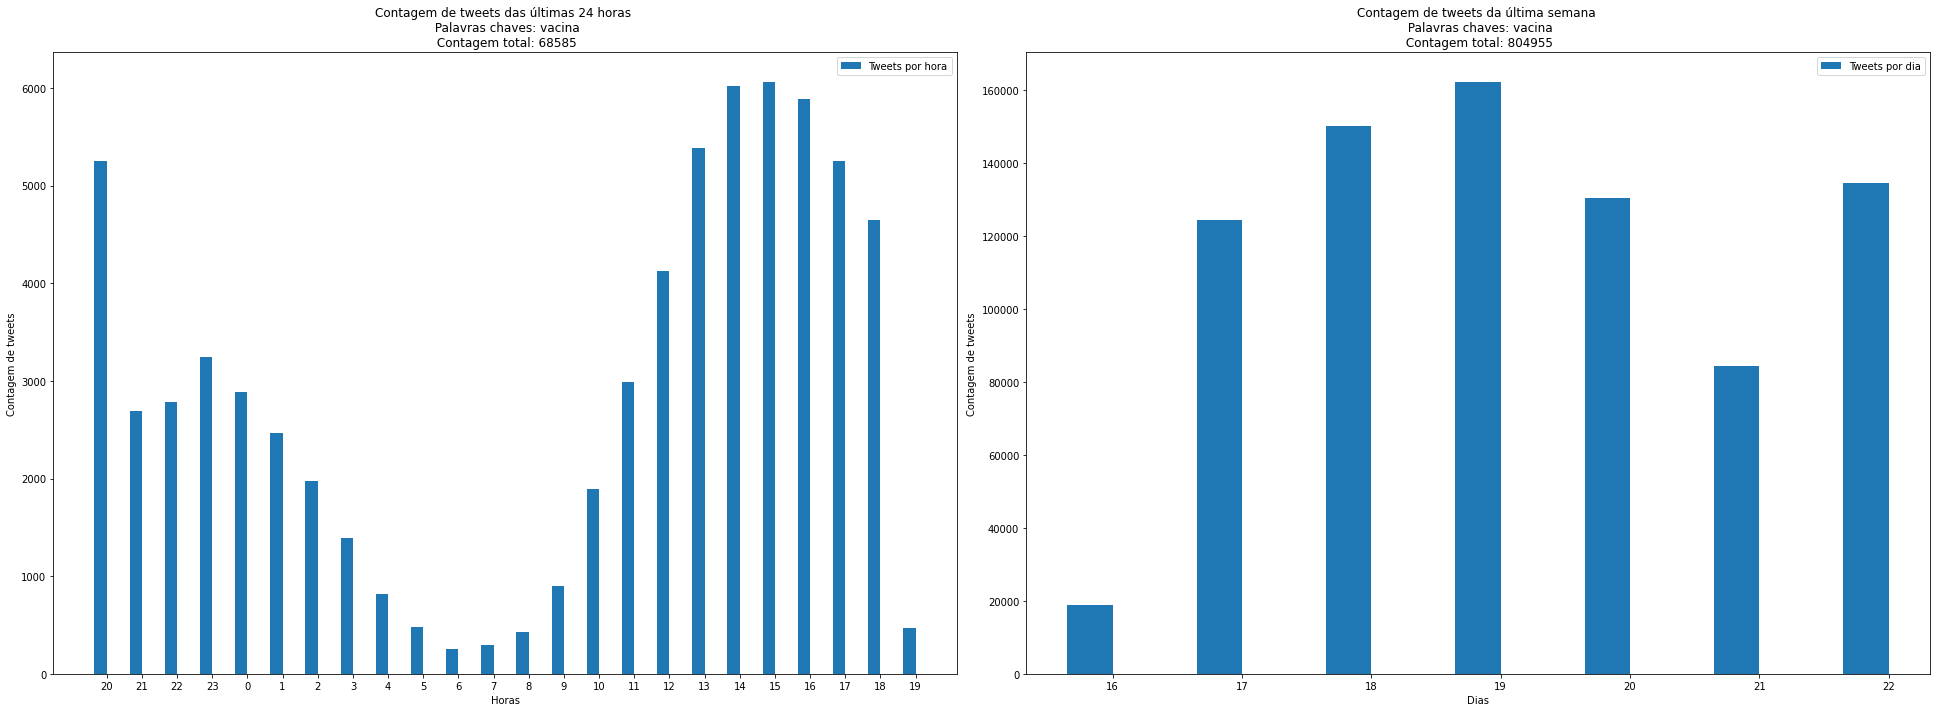

In [ ]:
# geração dos dois gráficos resultantes

# primeiro gráfico - contagem de tweets por hora
first_labels = first_hour_array
first_means = first_counts_array

x = np.arange(len(first_labels))  # localização do label
width = 0.35  # comprimento das barras

fig, (ax,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(27, 10)
rects1 = ax.bar(x - width/2, first_means, width, label='Tweets por hora')

ax.set_ylabel('Contagem de tweets') # label da coordenada Y
ax.set_xlabel('Horas') # label da coordenada X

ax.set_title('Contagem de tweets das últimas 24 horas \n Palavras chaves: '+str(keywords) +'\n Contagem total: '+str(first_total_counts)) # titulo do gráfico

ax.set_xticks(x)
ax.set_xticklabels(first_labels)

ax.legend()
fig.tight_layout()

# segundo gráfico - contagem de tweets dos últimos 7 dias
second_labels = second_days_array
second_means = second_counts_array

x2 = np.arange(len(second_labels))  # the label locations

rects2 = ax2.bar(x2 - width/2, second_means, width, label='Tweets por dia')

ax2.set_ylabel('Contagem de tweets')
ax2.set_xlabel('Dias')
ax2.set_title('Contagem de tweets da última semana \n Palavras chaves: '+str(keywords) +'\n Contagem total: '+str(second_total_counts))
ax2.set_xticks(x2)
ax2.set_xticklabels(second_labels)



ax2.legend()
fig.tight_layout()
                
# mostra ambos os gráficos
plt.show()